# **PCA**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.dtypes

,0
Type,int64
Alcohol,float64
Malic,float64
Ash,float64
Alcalinity,float64
Magnesium,int64
Phenols,float64
Flavanoids,float64
Nonflavanoids,float64
Proanthocyanins,float64


In [7]:
df.shape

(178, 14)

### **Exploratory Data Analysis (EDA):**

In [12]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [8]:
# Checking the missing values
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


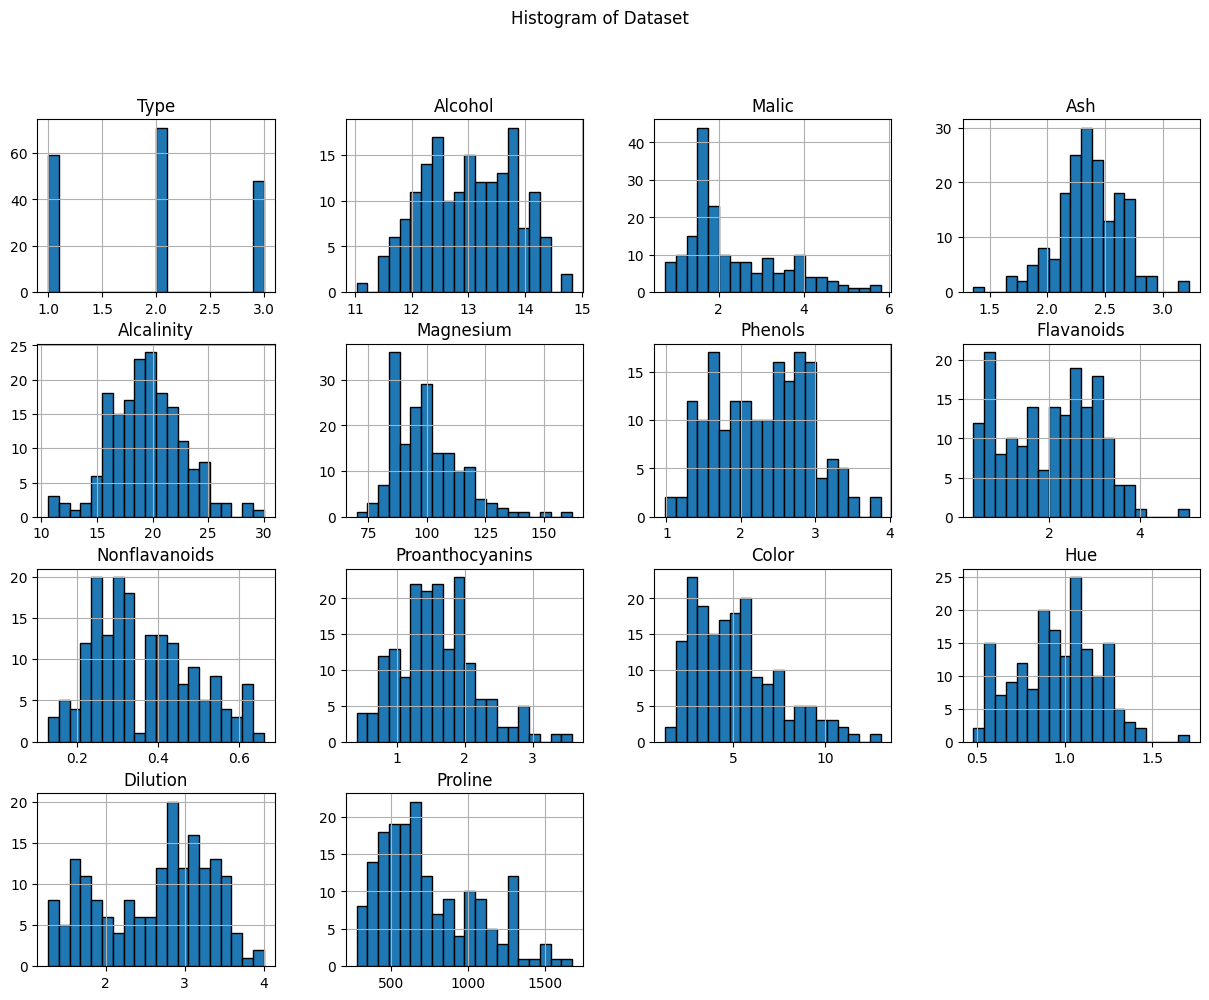

In [31]:
 # Visualization
df.hist(bins=20,figsize=(15,11),edgecolor='black')
plt.suptitle("Histogram of Dataset")
plt.show()

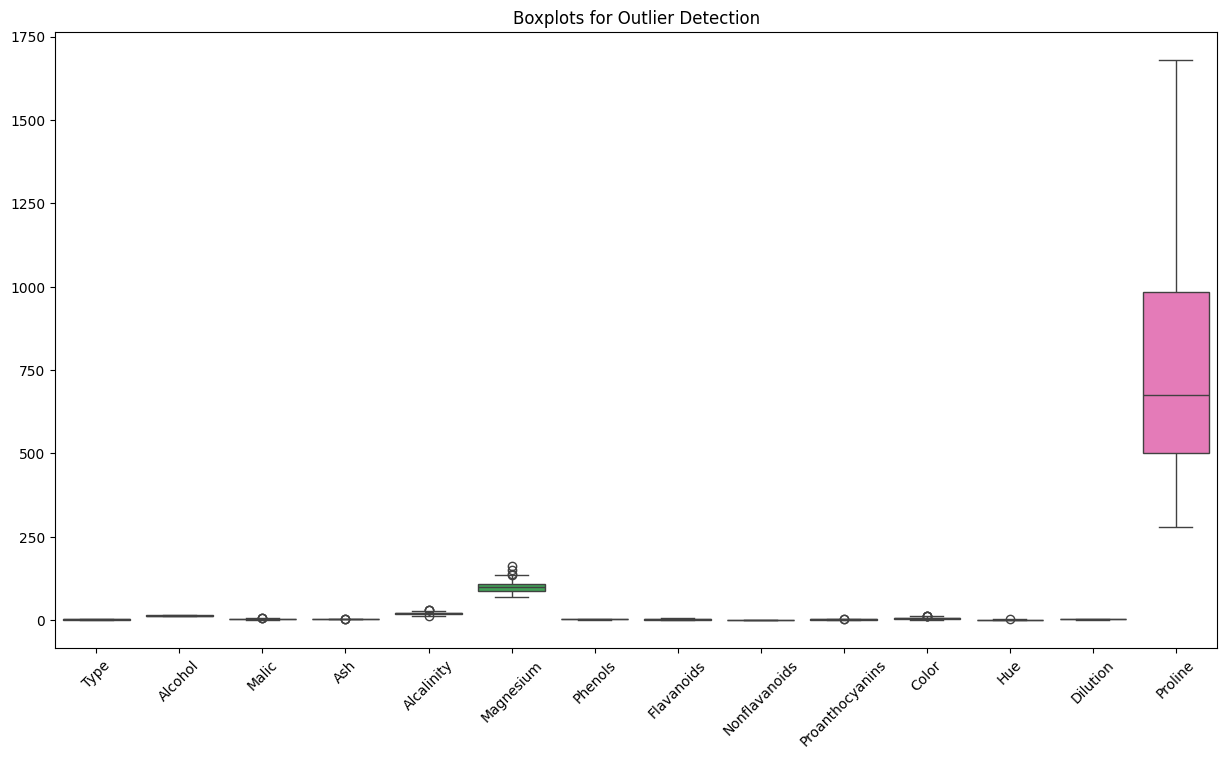

In [32]:
# Boxplot

plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.show()

In [36]:
# Outlier Treatment using IQR

for col in df:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nData cleaning completed!")


Data cleaning completed!


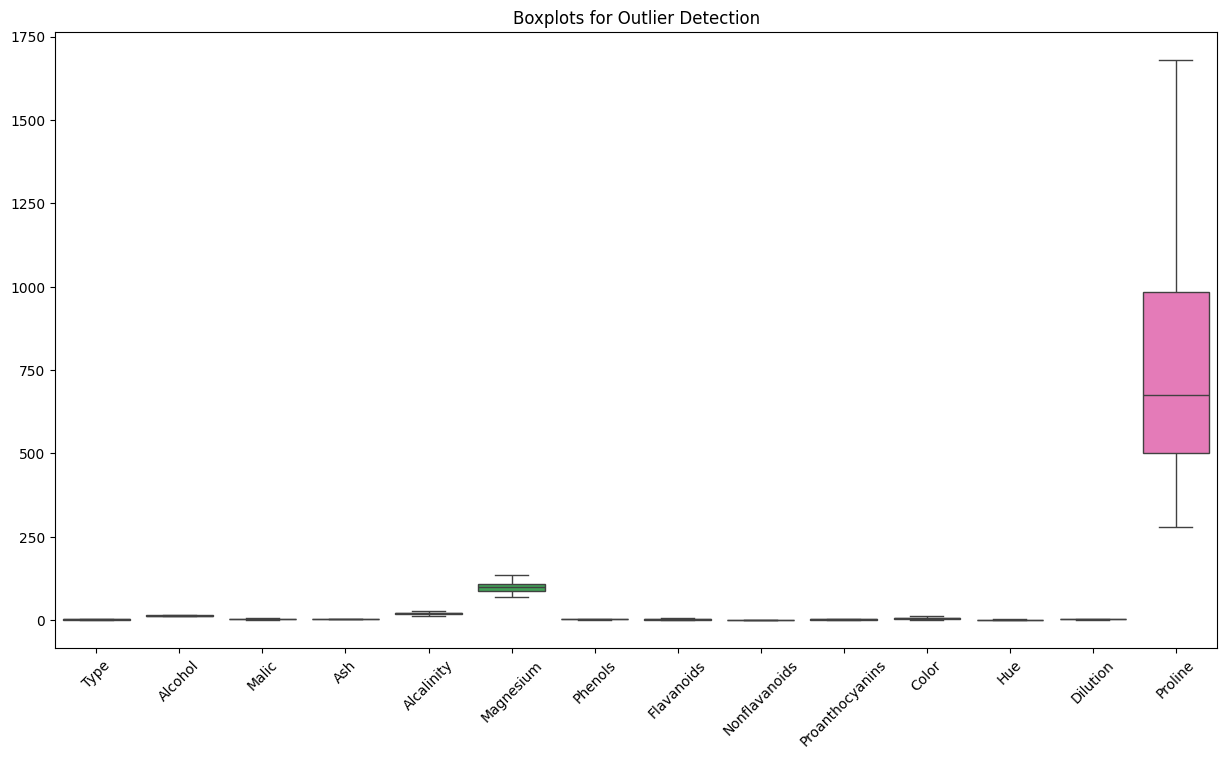

In [37]:
# Rechecking the outliers

plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.show()

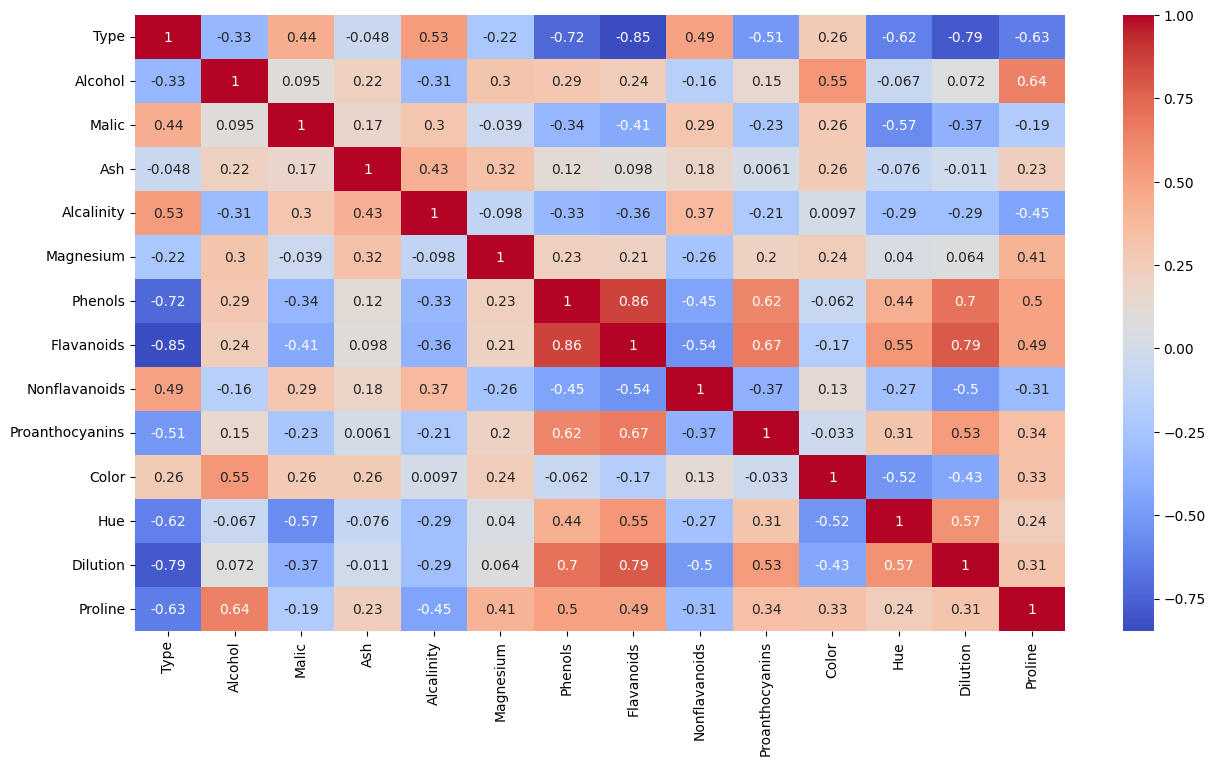

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

### **Dimensionality Reduction with PCA:**

In [39]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataframe
x = df.drop('Type', axis=1)
y = df['Type']


In [46]:
# Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [48]:
# PCA
pca = PCA(n_components = 13)
x_pca = pca.fit_transform(x_scaled)
x_pca

array([[ 3.35814747,  1.52022185, -0.12637492, ..., -0.35905487,
         0.59934286, -0.1082988 ],
       [ 2.22921481, -0.33326137, -2.04283756, ..., -0.12060222,
         0.3722891 ,  0.00364028],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.28999114,
         0.04671301,  0.04203325],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ...,  0.59573367,
         0.64695727, -0.02552532],
       [-2.37160346,  2.39380794, -0.56148477, ...,  0.35395561,
         0.34668062, -0.08347129],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.28617201,
        -0.13792419, -0.32602699]])

In [49]:
#loadings or weights
pca.components_

array([[ 0.14638695, -0.24575619, -0.00357256, -0.24470276,  0.14087111,
         0.39339196,  0.42172715, -0.29683634,  0.3161246 , -0.08589806,
         0.29661931,  0.37445501,  0.28670932],
       [ 0.47640599,  0.22659937,  0.31870602, -0.01442372,  0.32548413,
         0.05970156, -0.00642568,  0.02645156,  0.03046924,  0.52512375,
        -0.2734417 , -0.16621634,  0.36136098],
       [-0.20200334,  0.08529267,  0.62917149,  0.60759082,  0.13469654,
         0.14999765,  0.14919738,  0.17278943,  0.1437554 , -0.1509434 ,
         0.088899  ,  0.16637909, -0.12289582],
       [-0.01047049,  0.5306521 , -0.21998399,  0.0839072 , -0.33865862,
         0.19539529,  0.15272783, -0.1951409 ,  0.4165199 ,  0.07869216,
        -0.43117695,  0.18044325, -0.22457958],
       [-0.26800179,  0.04115158, -0.10982137,  0.06622776,  0.69127764,
        -0.14028688, -0.08743857, -0.57444452,  0.02838477, -0.0902172 ,
        -0.17992174, -0.06727723, -0.17033684],
       [ 0.22499723,  0.568195

In [51]:
# The amount of variance that each PCA explains
var = pca.explained_variance_ratio_
var

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [52]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.48,  56.09,  67.  ,  74.06,  80.36,  85.18,  89.21,  91.95,
        94.18,  96.11,  97.87,  99.2 , 100.01])

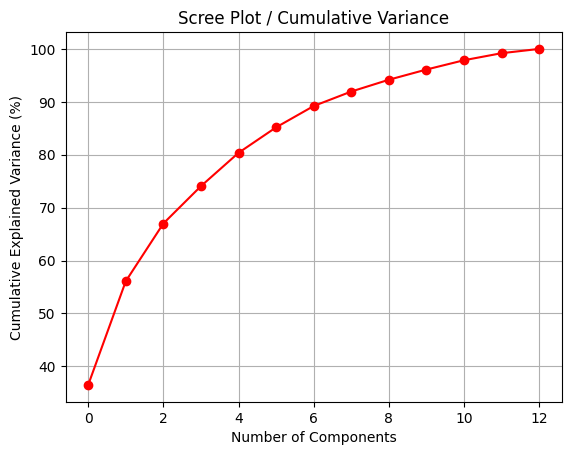

In [54]:
plt.plot(var1, color="red", marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Scree Plot / Cumulative Variance")
plt.grid(True)
plt.show()


In [55]:
pca = PCA(n_components=3)
pca_values = pca.fit_transform(x_scaled)
pca_values


array([[ 3.35814747e+00,  1.52022185e+00, -1.26374924e-01],
       [ 2.22921481e+00, -3.33261369e-01, -2.04283756e+00],
       [ 2.54005743e+00,  1.03695315e+00,  1.01884481e+00],
       [ 3.78112387e+00,  2.78256636e+00, -1.49224187e-01],
       [ 1.01687180e+00,  9.55225073e-01,  2.11316944e+00],
       [ 3.08026004e+00,  2.15271868e+00, -6.01559098e-01],
       [ 2.47175534e+00,  1.15588494e+00, -9.58401105e-01],
       [ 2.07139203e+00,  1.69122109e+00,  2.11298994e-01],
       [ 2.54045510e+00,  8.83884920e-01, -1.77881618e+00],
       [ 2.77052130e+00,  7.74653432e-01, -9.99870293e-01],
       [ 3.50454254e+00,  1.29825486e+00, -4.07371706e-01],
       [ 1.76782977e+00,  5.93348710e-01, -1.18098102e+00],
       [ 2.12641571e+00,  6.40665953e-01, -8.58112765e-01],
       [ 3.50743925e+00,  1.07718241e+00, -1.19594047e+00],
       [ 4.36509305e+00,  2.08205163e+00, -1.26244228e+00],
       [ 2.31969491e+00,  1.73051508e+00,  2.68412244e-01],
       [ 2.19278384e+00,  2.39898401e+00

In [61]:
transformed_DF = pd.DataFrame(pca_values,columns=['PC1','PC2','PC3'])
transformed_DF

,PC1,PC2,PC3
0,3.358147,1.520222,-0.126375
1,2.229215,-0.333261,-2.042838
2,2.540057,1.036953,1.018845
3,3.781124,2.782566,-0.149224
4,1.016872,0.955225,2.113169
...,...,...,...
173,-3.311751,2.173369,-0.383365
174,-2.612425,1.797712,0.210332
175,-2.671169,2.865301,-0.975126
176,-2.371603,2.393808,-0.561485


In [62]:
df_pca_col = transformed_DF.columns.to_list()
df_pca_col

['PC1', 'PC2', 'PC3']

### **Clustering with Original Data:**

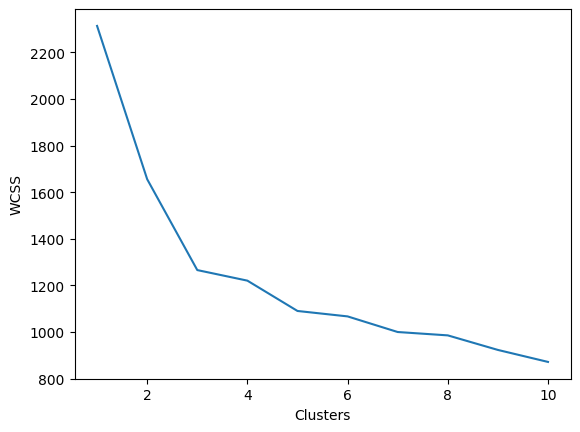

In [58]:
from sklearn.cluster import  KMeans

wcss =[]
for i in range(1,11):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)
labels = kmeans.labels_
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

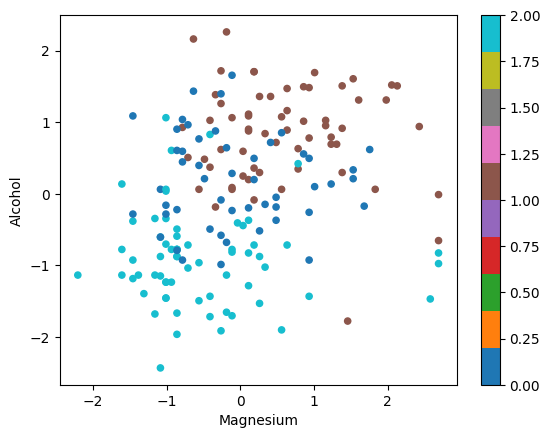

In [74]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled_df.plot(x='Magnesium',y='Alcohol',c=labels,cmap='tab10',kind='scatter')
plt.show()

In [75]:
# Silhouette Score
sil_original = silhouette_score(x_scaled, labels)
print("Silhouette Score (Original Data):", sil_original)

Silhouette Score (Original Data): 0.2852866569627524


### **Clustering with PCA Data:**

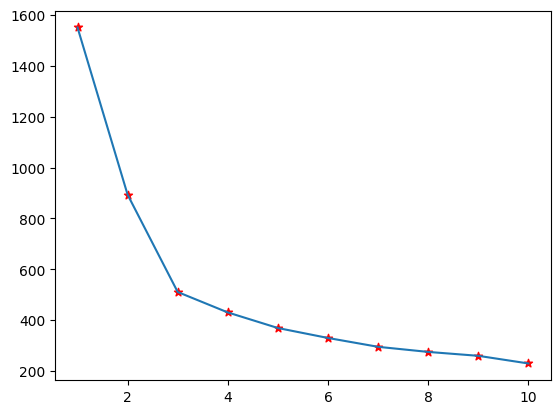

In [76]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(transformed_DF)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,marker='*',color='red')

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(transformed_DF)
transformed_clusters = kmeans.labels_
transformed_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

<Axes: xlabel='PC1', ylabel='PC2'>

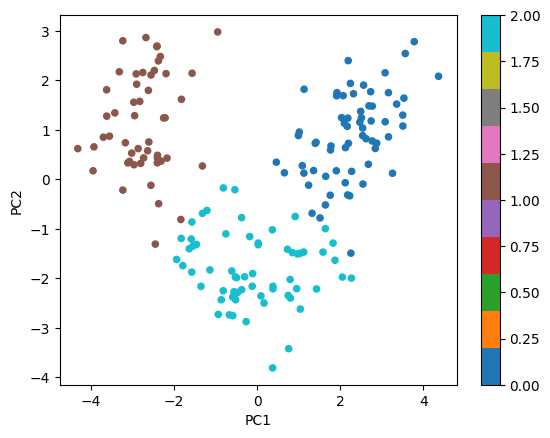

In [78]:
transformed_DF.plot(x='PC1',y='PC2',kind='scatter',c=transformed_clusters,colormap='tab10')

In [79]:
silhouette_score(transformed_DF,transformed_clusters)

np.float64(0.4543748124452129)

### **Comparison and Analysis**

Based on the clustering results and silhouette scores from the original and PCA-transformed data, let's compare and analyze the findings:

1.  **Clustering Results Comparison**:
    *   Compare the cluster assignments obtained from `kmeans.labels_` (original data) and `transformed_clusters` (PCA data). Are there noticeable differences in how data points are grouped?
    *   Visually compare the scatter plots of the original scaled data clustered (`x_scaled_df.plot(...)`) and the PCA-transformed data clustered (`transformed_DF.plot(...)`). How do the cluster shapes and separations differ?

2.  **Similarities and Differences**:
    *   Discuss any consistencies in the identified clusters between the two approaches. Do some clusters seem to correspond to similar groups of data points?
    *   Highlight the key differences in the clustering outcomes. Did one approach yield more distinct or well-separated clusters?

3.  **Impact of Dimensionality Reduction**:
    *   Reflect on how reducing the number of features using PCA influenced the clustering results. Did it improve or worsen the ability to find meaningful clusters in this dataset? Consider the silhouette scores as a quantitative measure.

4.  **Trade-offs**:
    *   Analyze the advantages and disadvantages of using PCA before clustering. Consider factors like computational cost, noise reduction, interpretability of components versus original features, and the effect on clustering performance (based on your observations and silhouette scores).
    *   Discuss the trade-offs of clustering directly on the original dataset, keeping in mind the potential impact of high dimensionality and correlated features.

By considering these points, you can articulate a comprehensive comparison and analysis of the two approaches.

### **Conclusion and Insights**

Based on your comparison and analysis in Task 5, let's summarize the key findings and discuss the practical implications:

1.  **Summary of Key Findings**:
    *   Briefly summarize the main observations from the clustering comparison. Which approach (original data or PCA-transformed data) seemed to perform better for clustering in this case, and why (referencing silhouette scores and visualizations)?

2.  **Practical Implications**:
    *   Discuss when using PCA in conjunction with clustering might be particularly beneficial in real-world data analysis scenarios. Consider situations with high-dimensional data, noise, or multicollinearity.
    *   Discuss when clustering directly on the original data might be more appropriate.
